In [ ]:
import pandas as pd
filtered_crypto_data = pd.read_csv('filtered_crypto_data.csv')
filtered_crypto_data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03


In [ ]:
crypto_data = filtered_crypto_data

In [ ]:
row_count_per_crypto = filtered_crypto_data.groupby('symbol').count()
row_count_per_crypto

,slug,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
symbol,,,,,,,,,,,,
BTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
ETH,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211,1211
LTC,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429
USDT,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
XRP,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429


In [ ]:
crypto_data['date'] = pd.to_datetime(crypto_data['date'])
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         6867 non-null   object        
 1   symbol       6867 non-null   object        
 2   name         6867 non-null   object        
 3   date         6867 non-null   datetime64[ns]
 4   ranknow      6867 non-null   int64         
 5   open         6867 non-null   float64       
 6   high         6867 non-null   float64       
 7   low          6867 non-null   float64       
 8   close        6867 non-null   float64       
 9   volume       6867 non-null   float64       
 10  market       6867 non-null   float64       
 11  close_ratio  6867 non-null   float64       
 12  spread       6867 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 697.6+ KB


In [ ]:
crypto_tech_indicator = filtered_crypto_data

In [ ]:
print("\nMissing Values per Column:")
crypto_tech_indicator.isnull().sum()


Missing Values per Column:


slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [ ]:
print("\nDuplicate Values per Column:")
print(crypto_tech_indicator.duplicated().sum())


Duplicate Values per Column:
0


In [ ]:
crypto_tech_indicator.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,4.297536e+09,0.0389,6.43
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,4.309551e+09,0.6432,2.27
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,3.846270e+09,0.0000,34.07
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,3.616321e+09,0.2225,29.62
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,3.758098e+09,0.7081,13.26


In [ ]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages')
import ta

In [ ]:
import ta 
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

# # Calculate SMA (e.g., 50-day and 200-day)
# crypto_tech_indicator['SMA_20'] = ta.SMA(crypto_tech_indicator['close'], timeperiod=20)
# crypto_tech_indicator['SMA_50'] = ta.SMA(crypto_tech_indicator['close'], timeperiod=50)
# crypto_tech_indicator['SMA_200'] = ta.SMA(crypto_tech_indicator['close'], timeperiod=200)

# crypto_tech_indicator['SMA_20'] = SMAIndicator(crypto_tech_indicator['close'].groupby('symbol'), window=20).sma_indicator()
# crypto_tech_indicator['SMA_50'] = SMAIndicator(crypto_tech_indicator['close'], window=50).sma_indicator()
# crypto_tech_indicator['SMA_200'] = SMAIndicator(crypto_tech_indicator['close'], window=200).sma_indicator()

#SMAIndicator expects a single time series, not a grouped object.

crypto_tech_indicator['SMA_20'] = crypto_tech_indicator.groupby('symbol')['close'].transform(lambda x: SMAIndicator(x, window=20).sma_indicator())
crypto_tech_indicator['SMA_50'] = crypto_tech_indicator.groupby('symbol')['close'].transform(lambda x: SMAIndicator(x, window=50).sma_indicator())
crypto_tech_indicator['SMA_200'] = crypto_tech_indicator.groupby('symbol')['close'].transform(lambda x: SMAIndicator(x, window=200).sma_indicator())


# # Calculate EMA (e.g., 20-day)
# #crypto_tech_indicator['EMA_20'] = ta.EMA(crypto_tech_indicator['close'], timeperiod=20)

# # Calculate RSI (e.g., 14-day)
crypto_tech_indicator['RSI'] = RSIIndicator(crypto_tech_indicator['close'],window=14).rsi()

# # Calculate Bollinger Bands
bollinger = BollingerBands(crypto_tech_indicator['close'], window=20, window_dev=2)
crypto_tech_indicator['Upper_Band'] = bollinger.bollinger_hband()
crypto_tech_indicator['Middle_Band'] = bollinger.bollinger_mavg()
crypto_tech_indicator['Lower_Band'] = bollinger.bollinger_lband()


In [ ]:
crypto_tech_indicator


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,SMA_20,SMA_50,SMA_200,RSI,Upper_Band,Middle_Band,Lower_Band
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,4.297536e+09,0.0389,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,4.309551e+09,0.6432,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,3.846270e+09,0.0000,34.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,3.616321e+09,0.2225,29.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,3.758098e+09,0.7081,13.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,1.821092e+09,0.6722,0.03,0.986611,0.988421,0.997249,46.746719,1.003077,0.986611,0.970145
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,1.814175e+09,0.3782,0.02,0.985833,0.988033,0.997135,44.860196,1.002525,0.985833,0.969141
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,1.827202e+09,0.7074,0.03,0.985383,0.987802,0.997056,49.031804,1.001730,0.985383,0.969035
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,1.853864e+09,0.6196,0.03,0.985597,0.987839,0.997049,56.316390,1.002512,0.985597,0.968683


In [ ]:
# crypto_tech_indicator['market_trend'] = crypto_tech_indicator['RSI'].apply(lambda x: 1 if x > 70 else (0 if x < 30 else None))

# # Bullish (1) if RSI > 70 
# # Bearish (0) if RSI < 30
# #None (NaN) if RSI is between 30 and 70

In [ ]:
# Bullish (1)
# RSI > 70  OR SMA_20 > SMA_50  OR Close price > Upper Bollinger Band (Strong bullish momentum)
 

# Bearish (0)
# RSI < 30 OR SMA_20 < SMA_50 OR Close price < Lower Bollinger Band (Strong bearish momentum)


# Neutral (2)
# If none of the above conditions are met.
 
def define_market_trend(row):
    if row['RSI'] > 70 or row['SMA_20'] > row['SMA_50'] or row['close'] > row['Upper_Band']:
        return 1  # Bullish
    elif row['RSI'] < 30 or row['SMA_20'] < row['SMA_50'] or row['close'] < row['Lower_Band']:
        return 0  # Bearish
    else:
        return 2  # Neutral

 

In [ ]:
crypto_tech_indicator['market_trend'] = crypto_tech_indicator.apply(define_market_trend, axis=1)

In [ ]:
crypto_tech_indicator

,slug,symbol,name,date,ranknow,open,high,low,close,volume,...,close_ratio,spread,SMA_20,SMA_50,SMA_200,RSI,Upper_Band,Middle_Band,Lower_Band,market_trend
0,bitcoin,BTC,Bitcoin,2015-01-01,1,320.430000,320.430000,314.000000,314.250000,8.036550e+06,...,0.0389,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,bitcoin,BTC,Bitcoin,2015-01-02,1,314.080000,315.840000,313.570000,315.030000,7.860650e+06,...,0.6432,2.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,bitcoin,BTC,Bitcoin,2015-01-03,1,314.850000,315.150000,281.080000,281.080000,3.305440e+07,...,0.0000,34.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,bitcoin,BTC,Bitcoin,2015-01-04,1,281.150000,287.230000,257.610000,264.200000,5.562910e+07,...,0.2225,29.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,bitcoin,BTC,Bitcoin,2015-01-05,1,265.080000,278.340000,265.080000,274.470000,4.396280e+07,...,0.7081,13.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,tether,USDT,Tether,2018-11-25,8,0.978475,0.990603,0.961215,0.980969,5.223930e+09,...,0.6722,0.03,0.986611,0.988421,0.997249,46.746719,1.003077,0.986611,0.970145,0
6863,tether,USDT,Tether,2018-11-26,8,0.975026,0.992572,0.967920,0.977243,4.696030e+09,...,0.3782,0.02,0.985833,0.988033,0.997135,44.860196,1.002525,0.985833,0.969141,0
6864,tether,USDT,Tether,2018-11-27,8,0.978976,0.991699,0.966279,0.984260,4.071230e+09,...,0.7074,0.03,0.985383,0.987802,0.997056,49.031804,1.001730,0.985383,0.969035,0
6865,tether,USDT,Tether,2018-11-28,8,0.983320,1.010000,0.980093,0.998622,4.765620e+09,...,0.6196,0.03,0.985597,0.987839,0.997049,56.316390,1.002512,0.985597,0.968683,0


In [ ]:
crypto_tech_indicator_clean = crypto_tech_indicator.dropna(subset=['SMA_20', 'SMA_50', 'Upper_Band', 'Middle_Band', 'Lower_Band'])

In [ ]:
crypto_tech_indicator['SMA_20'].fillna(method='ffill', inplace=True)
crypto_tech_indicator['SMA_50'].fillna(method='ffill', inplace=True)
crypto_tech_indicator['Upper_Band'].fillna(method='ffill', inplace=True)
crypto_tech_indicator['Middle_Band'].fillna(method='ffill', inplace=True)
crypto_tech_indicator['Lower_Band'].fillna(method='ffill', inplace=True)

/var/folders/k1/ctg4gzks42gbdd_q7ktmlj_m0000gn/T/ipykernel_23229/1905364389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crypto_tech_indicator['SMA_20'].fillna(method='ffill', inplace=True)
/var/folders/k1/ctg4gzks42gbdd_q7ktmlj_m0000gn/T/ipykernel_23229/1905364389.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_tech_indicator['SMA_20'].fillna(method='ffill', inplace=True)
/var/folders/k1/ctg4gzks42gbdd_q7ktmlj_m0000gn/T/

In [ ]:
crypto_tech_indicator_clean = crypto_tech_indicator.dropna(subset=['SMA_20', 'SMA_50', 'Upper_Band', 'Middle_Band', 'Lower_Band'])

In [ ]:
print("After Removing NaN values:")
print(crypto_tech_indicator_clean['market_trend'].value_counts(dropna=False))

After Removing NaN values:
market_trend
1    3542
0    3183
2      93
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features and target
features = ['RSI', 'SMA_20', 'SMA_50', 'Upper_Band', 'Middle_Band', 'Lower_Band']
target = 'market_trend'

X = crypto_tech_indicator_clean[features]
y = crypto_tech_indicator_clean[target]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.950509461426492
Confusion Matrix:
 [[607  29   0]
 [ 30 678   1]
 [  0   8  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       636
           1       0.95      0.96      0.95       709
           2       0.95      0.72      0.82        29

    accuracy                           0.95      1374
   macro avg       0.95      0.88      0.91      1374
weighted avg       0.95      0.95      0.95      1374



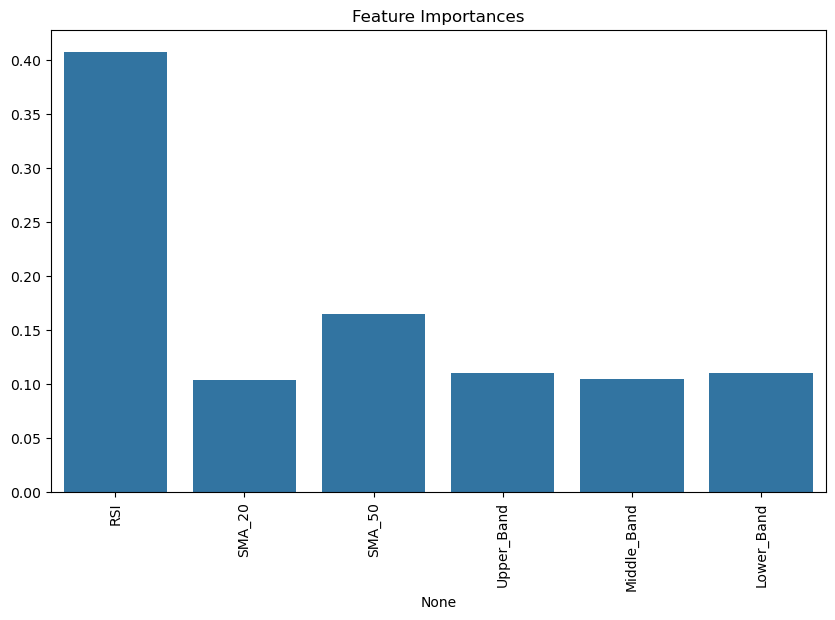

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=feature_names, y=feature_importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'crypto_market_trend_model.pkl')

['crypto_market_trend_model.pkl']